# person关键点检测-可视化训练日志

训练模型时在`work_dirs`目录生成记录训练日志，解析其中损失函数、评估指标等信息，并可视化。



## 导入工具包

In [1]:
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

## 载入训练日志

In [2]:
# 日志文件路径
log_path = 'mmpose/work_dirs/rtmpose-t_8xb256-420e_coco-256x192/20241203_211734/vis_data/scalars.json'

In [3]:
with open(log_path, "r") as f:
    json_list = f.readlines()

In [4]:
len(json_list)

111

In [5]:
eval(json_list[4])

{'base_lr': 0.0004965315315315308,
 'lr': 0.0004965315315315308,
 'data_time': 0.9334451103210449,
 'loss': 1.150310264825821,
 'loss_kpt': 1.150310264825821,
 'acc_pose': 0.44693909876284144,
 'time': 16.1046382522583,
 'epoch': 5,
 'iter': 125,
 'memory': 22028,
 'step': 125}

In [7]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()


for each in tqdm(json_list):
    data = eval(each)  # 将 JSON 字符串转换为 Python 对象
    if 'coco/bbox_mAP' in each:
        df_test = pd.concat([df_test, pd.DataFrame([data])], ignore_index=True)
    else:
        df_train = pd.concat([df_train, pd.DataFrame([data])], ignore_index=True)

100%|██████████| 111/111 [00:00<00:00, 275.25it/s]


In [8]:
df_train

,base_lr,lr,data_time,loss,loss_kpt,acc_pose,time,epoch,iter,memory,...,coco/AP,coco/AP .5,coco/AP .75,coco/AP (M),coco/AP (L),coco/AR,coco/AR .5,coco/AR .75,coco/AR (M),coco/AR (L)
0,0.000096,0.000096,1.201456,1.593997,1.593997,0.050910,17.046927,1.0,25.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000196,0.000196,1.045510,1.520715,1.520715,0.124332,16.917541,2.0,50.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000296,0.000296,0.905597,1.363414,1.363414,0.361363,16.614999,3.0,75.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000396,0.000396,0.929118,1.225839,1.225839,0.449974,16.280754,4.0,100.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000497,0.000497,0.933445,1.150310,1.150310,0.446939,16.104638,5.0,125.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.004000,0.004000,0.946553,0.879974,0.879974,0.678928,13.024641,98.0,2450.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,0.004000,0.004000,0.935283,0.879463,0.879463,0.685208,13.059755,99.0,2475.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,0.004000,0.004000,0.920807,0.876757,0.876757,0.694281,13.104687,100.0,2500.0,22028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,0.063323,NaN,NaN,NaN,1.857339,NaN,NaN,NaN,...,0.658106,0.897221,0.735304,0.633186,0.698678,0.687815,0.906014,0.754093,0.654329,0.736678


In [9]:
df_test

""


## 导出训练日志表格

In [10]:
df_train.to_csv('mmpose/work_dirs/rtmpose-t_8xb256-420e_coco-256x192/20241203_211734/训练日志-训练集.csv', index=False)
df_test.to_csv('mmpose/work_dirs/rtmpose-t_8xb256-420e_coco-256x192/20241203_211734/训练日志-测试集.csv', index=False)

## 设置Matplotlib中文字体

In [11]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [12]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [11]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体


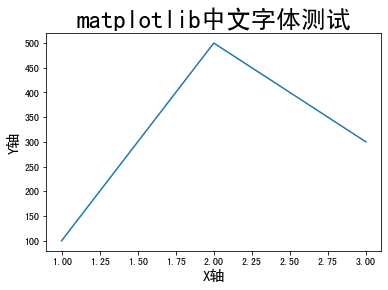

In [14]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 可视化辅助函数

In [12]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']

def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

## 训练集损失函数

In [13]:
df_train.columns

Index(['base_lr', 'lr', 'data_time', 'loss', 'loss_kpt', 'acc_pose', 'time',
       'epoch', 'iter', 'memory', 'step', 'coco/AP', 'coco/AP .5',
       'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5',
       'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)'],
      dtype='object')

In [14]:
metrics = ['loss', 'loss_kpt','coco/AP', 'coco/AP .5',
       'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5',
       'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)']

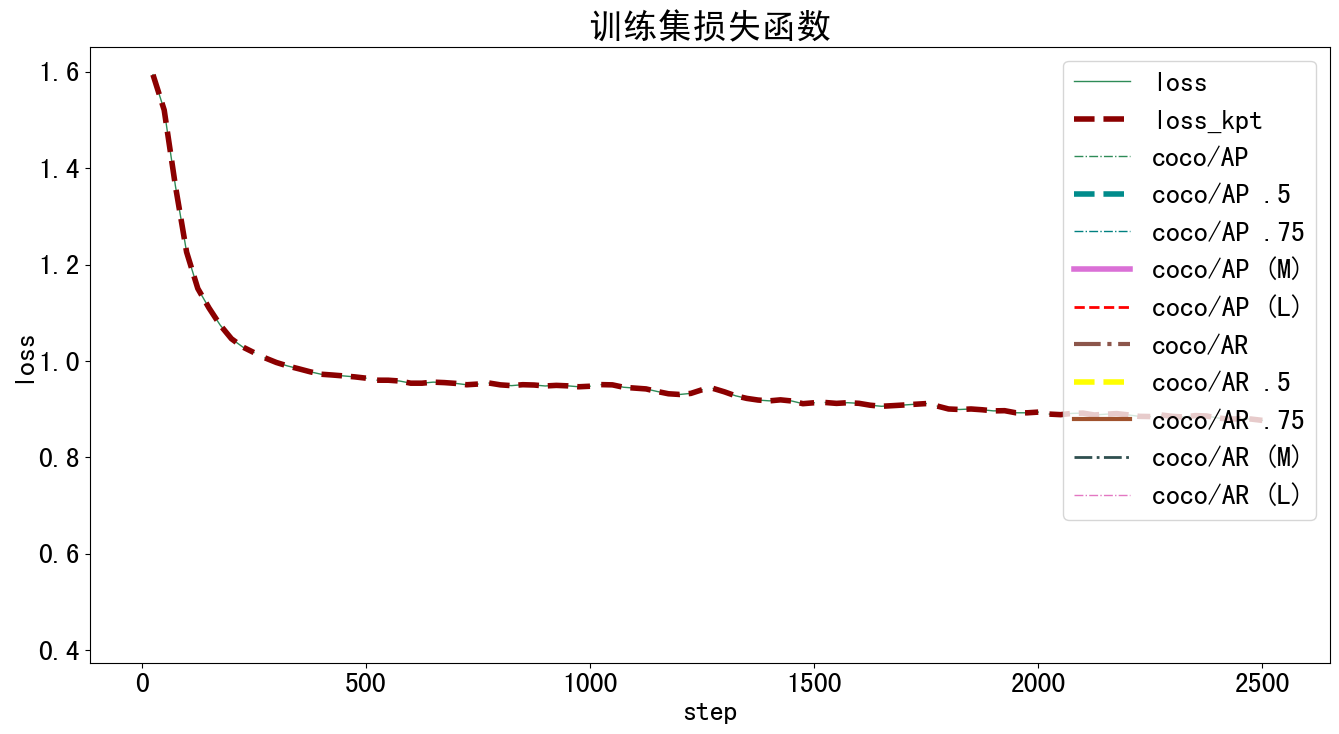

In [15]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 训练集准确率

In [16]:
metrics = ['acc_pose']

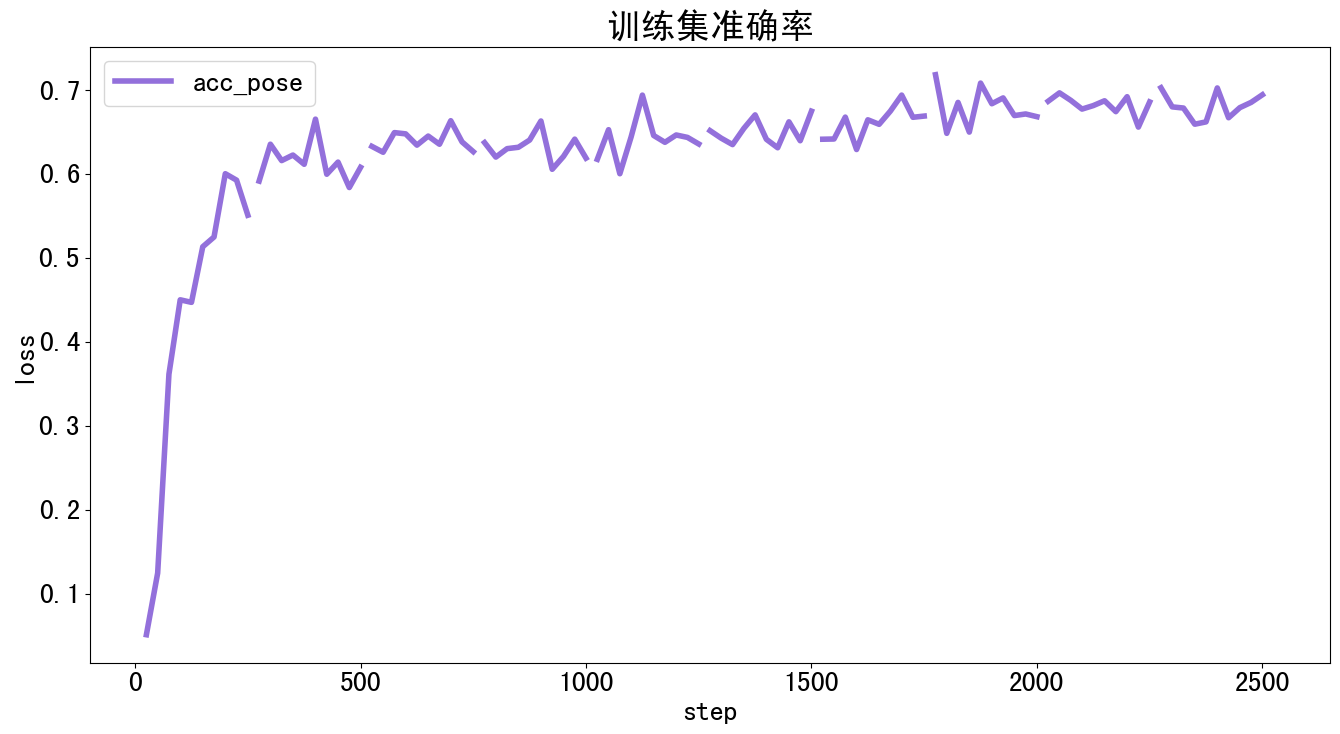

In [17]:
plt.figure(figsize=(16, 8))

x = df_train['step']
for y in metrics:
    plt.plot(x, df_train[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.xlabel('step', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-MS COCO Metric

In [21]:
df_test.columns

Index(['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)',
       'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)',
       'PCK', 'AUC', 'NME', 'data_time', 'time', 'step'],
      dtype='object')

In [22]:
metrics = ['coco/AP', 'coco/AP .5', 'coco/AP .75', 'coco/AP (M)', 'coco/AP (L)', 'coco/AR', 'coco/AR .5', 'coco/AR .75', 'coco/AR (M)', 'coco/AR (L)', 'PCK', 'AUC']


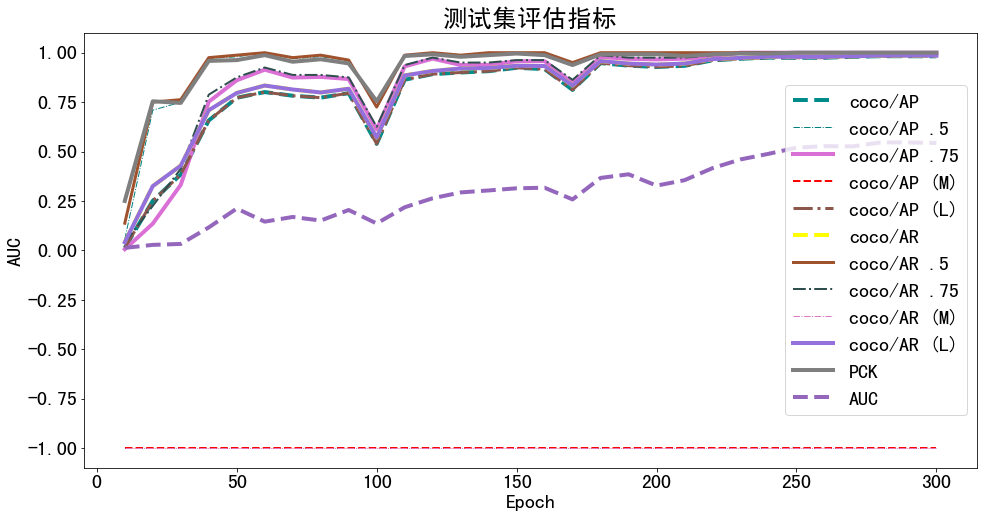

In [23]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()

## 测试集评估指标-NME

In [24]:
metrics = ['NME']

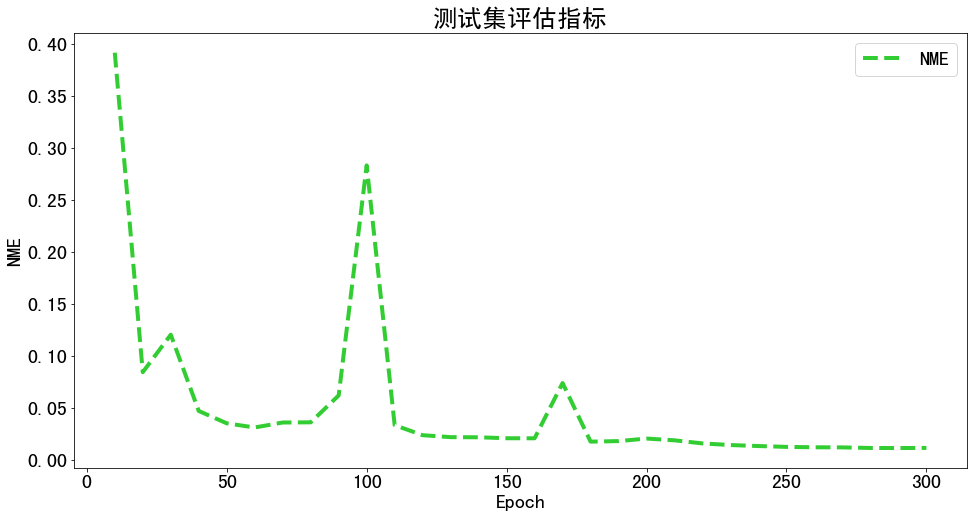

In [25]:
plt.figure(figsize=(16, 8))

x = df_test['step']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
# plt.ylim([0, 100])
plt.xlabel('Epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集评估指标', fontsize=25)
plt.savefig('测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()